# Overview on the ecological data resource

### Import modules

In [1]:
import pandas as pd
import json

import matplotlib.pyplot as plt
from matplotlib_venn import venn3_unweighted

In [2]:
%matplotlib inline

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
DATA_DIR = '../data'
MAPPING_DIR = '../data/mapping'

In [5]:
ncbi_ids_trefle = json.load(open(f'{MAPPING_DIR}/trefle_grounding.json'))
ncbi_ids_try = json.load(open(f'{MAPPING_DIR}/trefle_grounding.json'))

In [6]:
trefle_df = pd.read_csv(f'{DATA_DIR}/raw/trefle_species_dump.csv', sep='\t', low_memory=False)

trefle_df['scientific_name'] = trefle_df['scientific_name'].str.replace('?', '')

trefle_df['ncbi_ids'] = trefle_df['scientific_name'].map(lambda x: ncbi_ids_trefle[x][0])

trefle_df.head(2)

/var/folders/61/bn_r735d70z03hg56wh7hsg80000gn/T/ipykernel_22032/859058547.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  trefle_df['scientific_name'] = trefle_df['scientific_name'].str.replace('?', '')


,id,scientific_name,rank,genus,family,year,author,bibliography,common_name,family_common_name,image_url,flower_color,flower_conspicuous,foliage_color,foliage_texture,fruit_color,fruit_conspicuous,fruit_months,bloom_months,ground_humidity,growth_form,growth_habit,growth_months,growth_rate,edible_part,vegetable,edible,light,soil_nutriments,soil_salinity,anaerobic_tolerance,atmospheric_humidity,average_height_cm,maximum_height_cm,minimum_root_depth_cm,ph_maximum,ph_minimum,planting_days_to_harvest,planting_description,planting_sowing_description,planting_row_spacing_cm,planting_spread_cm,synonyms,distributions,common_names,url_usda,url_tropicos,url_tela_botanica,url_powo,url_plantnet,url_gbif,url_openfarm,url_catminat,url_wikipedia_en,ncbi_ids
0,101119,Abies balsamea,species,Abies,Pinaceae,1768.0,(L.) Mill.,Gard. Dict. ed. 8: n.º 3 (1768),Balsam fir,Pine family,https://bs.floristic.org/image/o/46adef49b8399...,yellow,False,green,medium,brown,False,NaN,NaN,NaN,Single Stem,Tree,NaN,Slow,NaN,False,False,7.0,5.0,0.0,None,5.0,1828.0,1828.0,50.0,6.0,4.0,NaN,NaN,NaN,NaN,NaN,"Pinus balsamea,Pinus taxifolia,Picea balsamea,...","Alberta,Connecticut,Iowa,Labrador,Maine,Manito...","Canada balsam,Balsam,Balsam fir,Fir balsam,Eas...",https://plants.usda.gov/core/profile?symbol=ABBA,NaN,NaN,http://powo.science.kew.org/taxon/urn:lsid:ipn...,https://identify.plantnet.org/species/the-plan...,https://www.gbif.org/species/2685383,NaN,NaN,https://en.wikipedia.org/wiki/Abies balsamea,ncbitaxon:90345
1,101124,Abies bracteata,species,Abies,Pinaceae,1845.0,(D.Don) Poit.,"Rev. Hort. (Paris), sér. 2, 4: 7 (1845)",Bristlecone fir,Pine family,http://d2seqvvyy3b8p2.cloudfront.net/48f25e972...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tree,NaN,NaN,NaN,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Abies venusta,Pinus bracteata,Picea bracteata,...",California,NaN,https://plants.usda.gov/core/profile?symbol=ABBR,NaN,NaN,http://powo.science.kew.org/taxon/urn:lsid:ipn...,NaN,https://www.gbif.org/species/2685479,NaN,NaN,https://en.wikipedia.org/wiki/Abies bracteata,ncbitaxon:66168


### Load try database

In [7]:
# This database is not public and cannot be shared externally without author permission. Please download the dump from the original resource
try_df = pd.read_csv(
    '/Users/yojana/Downloads/23255_08112022232657/23255.txt',
    sep='\t', 
    encoding='latin1',
    low_memory=False
)

try_df['ncbi_ids'] = try_df['SpeciesName'].map(lambda x: ncbi_ids_try[x][0] if x in ncbi_ids_try else '')

try_df.head(2)

,LastName,FirstName,DatasetID,Dataset,SpeciesName,AccSpeciesID,AccSpeciesName,ObservationID,ObsDataID,TraitID,TraitName,DataID,DataName,OriglName,OrigValueStr,OrigUnitStr,ValueKindName,OrigUncertaintyStr,UncertaintyName,Replicates,StdValue,UnitName,RelUncertaintyPercent,OrigObsDataID,ErrorRisk,Reference,Comment,StdValueStr,Unnamed: 28,ncbi_ids
0,Craine,Joseph,130,Global 15N Database,Cupaniopsis anacardioides,15904,Cupaniopsis anacardioides,19375,487821,NaN,NaN,113,Reference / source,Publication,Cook 2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Craine, J. M., A. J. Elmore, M. P. M. Aidar, M...",NaN,1593,NaN,ncbitaxon:13467
1,Craine,Joseph,130,Global 15N Database,Cupaniopsis anacardioides,15904,Cupaniopsis anacardioides,19375,487825,NaN,NaN,60,Longitude,Long,130.9,NaN,NaN,NaN,NaN,NaN,130.9,NaN,NaN,NaN,NaN,"Craine, J. M., A. J. Elmore, M. P. M. Aidar, M...",decimal,NaN,NaN,ncbitaxon:13467


In [8]:
try_df.dropna(subset=['ncbi_ids'], inplace=True)
try_df.shape

(1343003, 30)

### Load plant-disease evidences

In [9]:
collapsed_plant_disease_df = pd.read_csv(
    f'{DATA_DIR}/processed/plant_disease_collapsed.tsv.gz',
    sep='\t',
    compression='gzip',
    low_memory=False
)
collapsed_plant_disease_df.head(2)

,plant_curie,plant_name,disease_curie,database,evidence
0,ncbitaxon:3369,Cryptomeria japonica,mondo:0024623,bern2,10067319_8
1,ncbitaxon:3369,Cryptomeria japonica,mondo:0005087,bern2,10067319_8


In [10]:
medicinal_plant_list = set(collapsed_plant_disease_df['plant_curie'].to_list())

In [11]:
trefle_plants = set(trefle_df['ncbi_ids'].to_list())

In [12]:
try_plants = set(try_df['ncbi_ids'].to_list())

### Overlapping data

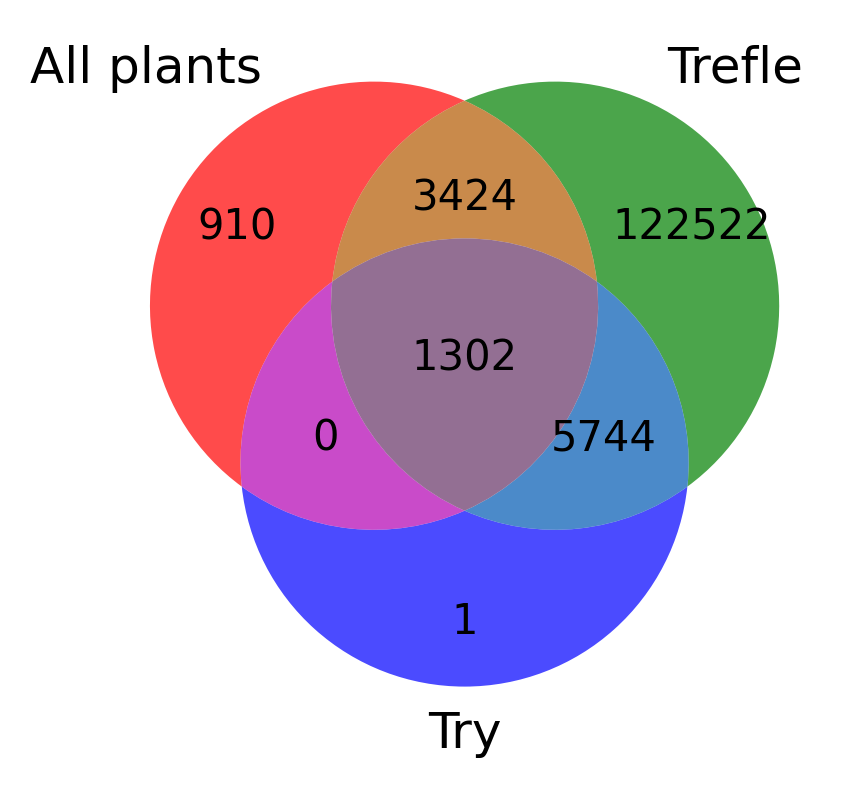

In [13]:
plt.figure(dpi=300, figsize=([3,3]))

venn3_unweighted(
    [medicinal_plant_list, trefle_plants, try_plants],
    ('All plants', 'Trefle', 'Try'),
    alpha=.7
)

plt.tight_layout()
plt.savefig(f'{DATA_DIR}/figures/supplementary_figure_2.png', bbox_inches='tight')
plt.show()

In [14]:
## Overlap between the trefle and medicinal plants
len(trefle_plants.intersection(medicinal_plant_list)), len(medicinal_plant_list)

(4726, 5636)

In [15]:
## Overlap between the try and medicinal plants
len(try_plants.intersection(medicinal_plant_list)), len(medicinal_plant_list)

(1302, 5636)

In [16]:
## Plants not found in trefle
len(medicinal_plant_list.difference(trefle_plants))

910

In [17]:
## Plants not found in try
len(medicinal_plant_list.difference(try_plants))

4334

In [18]:
## Overlap between try + trefle and medicinal plants
combined = try_plants.union(trefle_plants)
len(medicinal_plant_list.difference(combined))

910

In [19]:
len(medicinal_plant_list.intersection(combined))

4726